In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.integrate import odeint
import scipy
import math

import ipywidgets as widgets

## Inviscid Burgers' equation (Уравнение Хопфа): 
### $\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0$

### $-5 < x < 10$

### $u(x, 0)=exp(-x^2/2)$

### $0 < t < t_{max} = 1$

Общее решение:

$u(x, t)=f(x - ut)$

$u(x, 0) = f(x) = exp(-\frac{x^2}{2})$

$u(x, t) = exp(-\frac{(x-ut)^2}{2})$

### Задание:
***1) Найти максимальную невязку***

***2) Сравнить два численных метода***

***Методичка Е. А. Кузнецов, Д. А. Шапиро ММФ***

In [29]:
a = -5
b = 10
t_min = 0
t_max = 10

In [30]:
n = 1000

x = np.linspace(a, b, n)
t = np.linspace(t_min, t_max, n)

In [31]:
def u0(x):
    return np.where(x < 5, 1, 0)

def u0_(x):
    return np.exp((-x**2)/2)

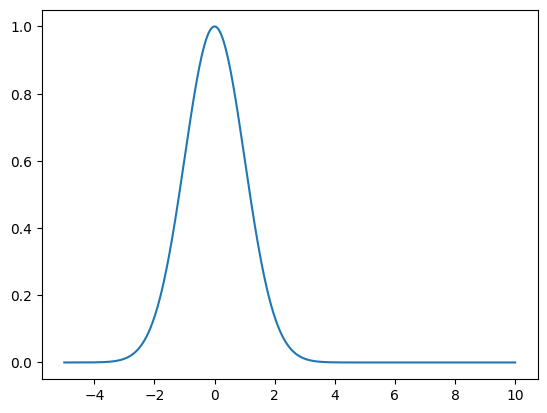

In [32]:
plt.plot(x, u0_(x))

In [33]:
def EulerMethod(X: np.array, T: np.array):
    dt = T[1] - T[0]
    dt  = dt / 2
    print(dt)
    dx = X[1] - X[0]
    dx = dx / 2
    u = np.zeros((X.size, T.size))
    
    # Initial conditions
    u[:, 0] = u0_(X) 

    for n in range(T.size - 1):
        for i in range(1, X.size - 1):
            u[i, n+1] = u[i, n] - u[i, n] * (dt/dx) * (u[i, n] - u[i - 1, n])

    return u

In [34]:
mu = 1 #0.1
nu = 0.05 #kinematic viscosity coefficient

dx = x[1] - x[0]
k = 2 * np.pi*np.fft.fftfreq(n, d = dx)
  
u0_init = u0_(x) 

def burg_system(u,t,k,mu,nu):
    u_hat = np.fft.fft(u)
    u_hat_x = 1j*k*u_hat
    u_hat_xx = -k**2*u_hat
    
    u_x = np.fft.ifft(u_hat_x)
    u_xx = np.fft.ifft(u_hat_xx)
    
    u_t = -mu*u*u_x + nu*u_xx
    return u_t.real

In [35]:
# n = 2000

# x = np.linspace(a, b, n)
# t = np.linspace(t_min, t_max, n)
U_spec = odeint(burg_system, u0_init, t, args=(k,mu,nu,), mxstep=n).T

In [36]:
U_gt = EulerMethod(x, t)
# print(t*2)

0.005005005005005005


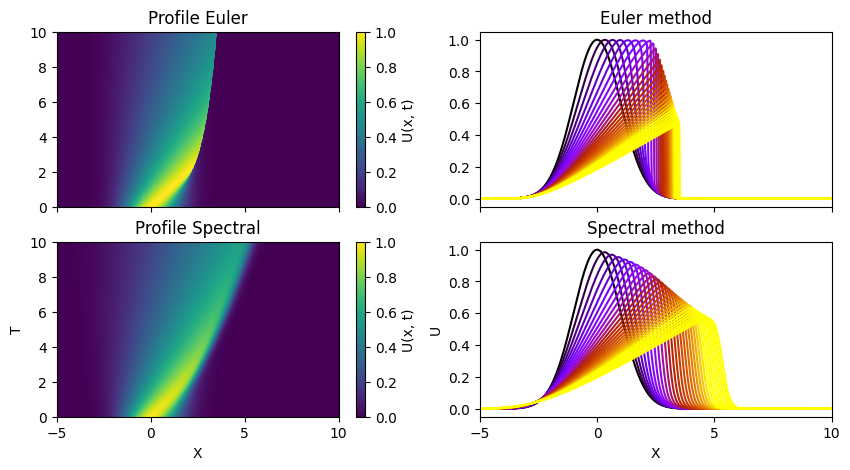

In [37]:
fg, ax = plt.subplots(2, 2, figsize=(10, 5), dpi=100, sharex=True)
ax[0, 0].pcolormesh(x, t, U_gt.T)
fg.colorbar(ax=ax[0, 0], label="U(x, t)", mappable=None)
ax[0, 0].set_title("Profile Euler")
grid = 30 #50
colour=iter(cm.gnuplot(np.linspace(0,10,230)))
for i in range(0, t.size, t.size // grid):
    c=next(colour)
    ax[0, 1].set_title("Euler method")
    ax[0, 1].plot(x, U_gt[:, i], c=c)

ax[1, 0].pcolormesh(x, t, U_spec.T)
fg.colorbar(ax=ax[1, 0], label="U(x, t)", mappable=None)
ax[1, 0].set_title("Profile Spectral")
ax[1, 0].set_xlabel("X")
ax[1, 0].set_ylabel("T")
grid = 30
colour=iter(cm.gnuplot(np.linspace(0,10,230)))
for i in range(0, t.size, t.size // grid):
    c=next(colour)
    ax[1, 1].set_title("Spectral method")
    ax[1, 1].set_xlabel("X")
    ax[1, 1].set_ylabel("U")
    ax[1, 1].plot(x, U_spec[:, i], c=c)
# indexes = np.nonzero(x<2)
# x_new1 = x[indexes]
# t_new1 = t[indexes]
# ax[1, 0].plot(x_new1, t_new1)
# print(np.nonzero(x==0), t[333], t[466]-t[333])

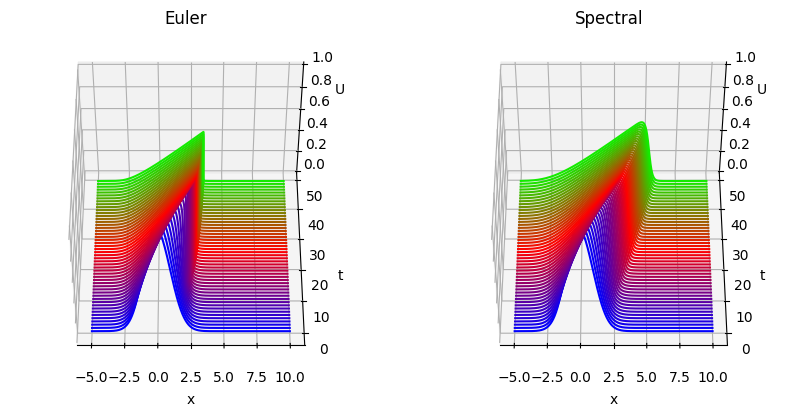

In [38]:
fg, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100, subplot_kw=dict(projection='3d'))

ax[0].set_title('Euler')
ax[1].set_title('Spectral')

ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[0].set_zlabel('U')

ax[1].set_xlabel('x')
ax[1].set_ylabel('t')
ax[1].set_zlabel('U')

ax[0].view_init(50, -90)
ax[1].view_init(50, -90)

y_plot0 = U_gt.T[0:-1:20,:]
y_plot1 = U_spec.T[0:-1:20,:]
for j in range(y_plot0.shape[0]):
    ys = j*np.ones(y_plot0.shape[1])
    ax[0].plot(x,ys, y_plot0[j,:], color = plt.cm.brg(j *  5))
    ax[1].plot(x,ys, y_plot1[j,:], color = plt.cm.brg(j *  5))

plt.show()

1.6487806260894964
1.0060060060060056


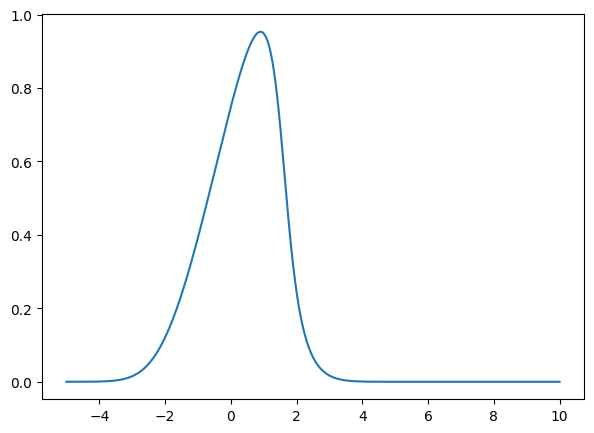

1.6516516516516517
1.9969969969969972


In [39]:
nonzero_indexes = np.nonzero(x>0)
x_new = x[nonzero_indexes]
U0_dir = np.exp((-x_new**2)/2) * (-x_new)
arr = -1/U0_dir
min = np.min(arr)
print(min)
x0 = x_new[np.nonzero(arr==min)]
print(x0[0])

plt.figure(figsize=(7, 5), dpi=100)
plt.plot(x, U_spec[:, 99])
plt.show()
print(t[165])
print(x[466])

In [40]:
#функция
def F(u, x, t):
    return u - np.exp((-(x-u*t)**2)/2)
 
#производная
def F1(u, x, t):
    return 1 - np.exp((-(x-u*t)**2)/2) * ((x-u*t)*t)
 
 
def NewtonMethod(x, t, u0):
    xn = u0
    xn1 = xn-F(xn, x, t)/F1(xn, x, t)
    while abs(xn1-xn) > math.pow(10,-5):
        xn = xn1
        xn1 = xn-F(xn, x, t)/F1(xn, x, t)
    return xn1

Посчитаем точное решение, чтобы проверить методы и вывезти невязку

Решим систему первых интегралов, выражая U(x, t) формула ниже, подставив известные x, t.

Выводим U(x, t) до времени опрокидывания.

### $u(x, t) = exp(-\frac{(x-ut)^2}{2})$

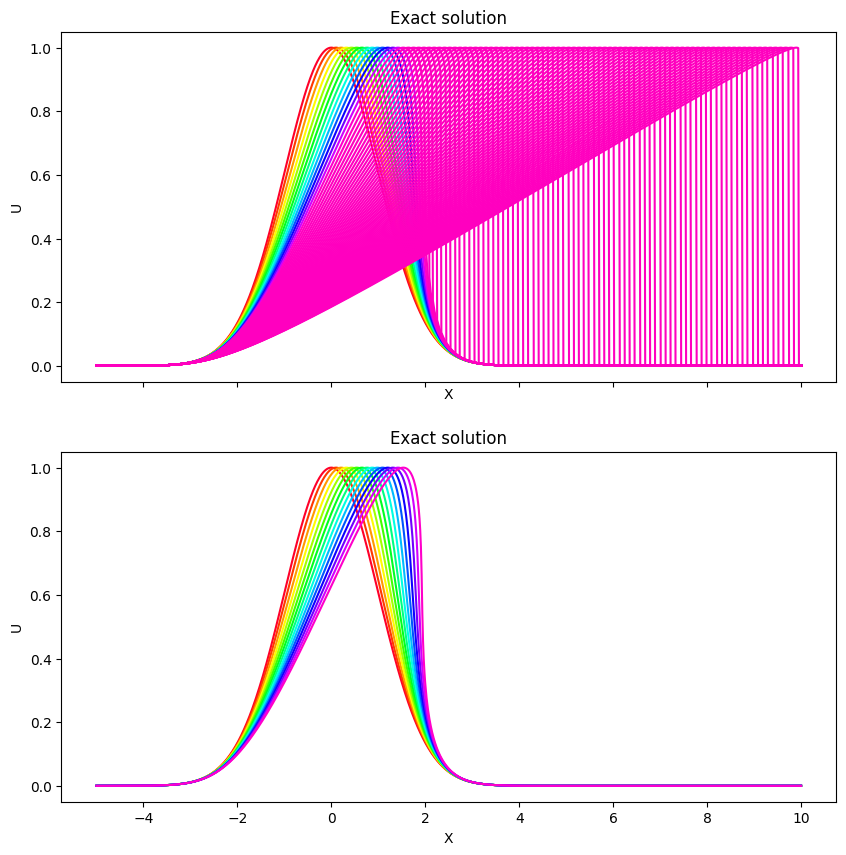

In [41]:
_indexes = np.nonzero(t<min) #(x<x[466])
t_new = t[_indexes]
x_new0 = x[_indexes]

u0 = 2
U_GTruth = np.zeros((t.size, x.size))
U_GTruth[:, 0] = u0_init
for i in range(t.size - 1):
    for j in range(1, x.size - 1):
        U_GTruth[j, i+1] = NewtonMethod(x[j], t[i], U_GTruth[j-1, i])

fg, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=100, sharex=True)
colour=iter(cm.gist_rainbow(np.linspace(0,7,100)))
for i in range(0, t.size, t.size // 90):
    c=next(colour)
    ax[0].set_title("Exact solution")
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("U")
    ax[0].plot(x, U_GTruth[:, i], c=c)
    
u0 = 2
U_GTruth0 = np.zeros((x.size, t_new.size))
U_GTruth0[:, 0] = u0_init
for i in range(t_new.size - 1):
    for j in range(1, x.size - 1):
        U_GTruth0[j, i+1] = NewtonMethod(x[j], t[i], U_GTruth0[j-1, i])

colour=iter(cm.gist_rainbow(np.linspace(0,7,100)))
for i in range(0, t_new.size, t_new.size // 15):
    c=next(colour)
    ax[1].set_title("Exact solution") # до точки опрокидывания
    ax[1].set_xlabel("X")
    ax[1].set_ylabel("U")
    ax[1].plot(x, U_GTruth0[:, i], c=c)

Text(0, 0.5, 'T')

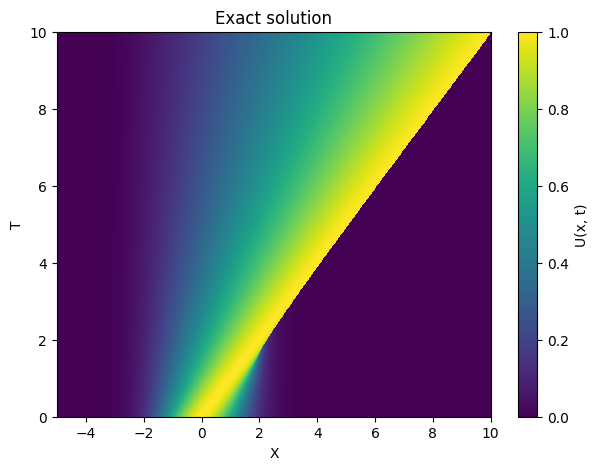

In [42]:
plt.figure(figsize=(7, 5), dpi=100)
plt.pcolormesh(x, t, U_GTruth.T)
plt.colorbar(label="U(x, t)", mappable=None)
plt.title("Exact solution")
plt.xlabel("X")
plt.ylabel("T")

1.6516516516516517


Text(0, 0.5, 'U')

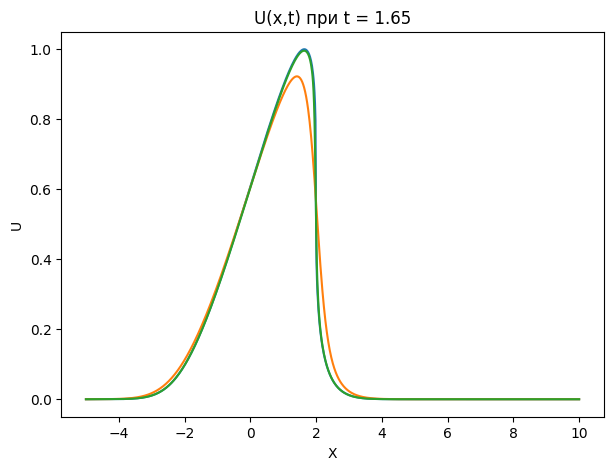

In [43]:
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(x, U_GTruth[:, 165])
plt.plot(x, U_spec[:, 165])
plt.plot(x, U_gt[:, 165])
plt.title("U(x,t) при t = 1.65")
print(t[165])
plt.xlabel("X")
plt.ylabel("U")

Text(0.5, 0, 't')

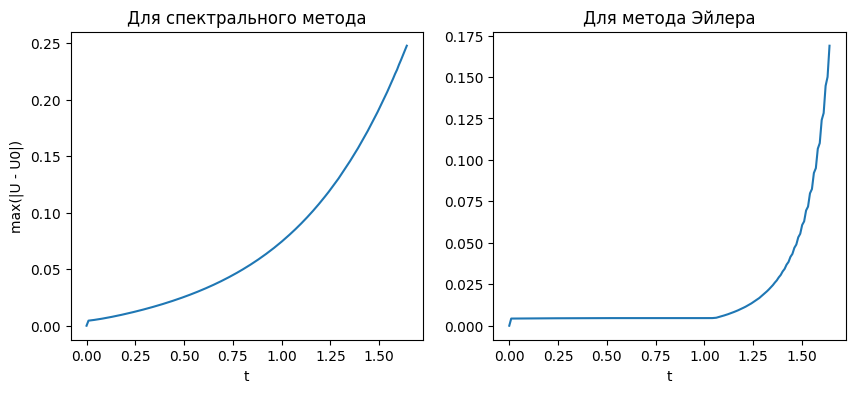

In [45]:
# dU_spec = np.zeros(t.size)
# for i in range(0, t.size):
#     dU_spec[i] = np.max((U_spec[:, i] - U_GTruth[:, i]) / (U_GTruth[:, i]+10**(-10)))
    
# dU_gt = np.zeros(t.size)
# for i in range(0, t.size):
#     dU_gt[i] = np.max((U_gt[:, i] - U_GTruth[:, i]) / (U_GTruth[:, i]+10**(-10)))

# n = 1000
# count = np.linspace(a, b, n)
# t = np.linspace(t_min, t_max, n)

dU_spec = np.zeros(t_new.size)
for i in range(0, t_new.size):
    indexes_nonzero = np.nonzero(U_GTruth0[:, i]>0) #(x<x[466])
    dU_spec[i] = np.max(np.abs(U_spec[indexes_nonzero, i] - U_GTruth0[indexes_nonzero, i]))
#     dU_spec[i] = np.max((U_spec[:, i] - U_GTruth0[:, i]) / (U_GTruth0[:, i]+10**(-10)))
    
dU_gt = np.zeros(t_new.size)
for i in range(0, t_new.size):
    indexes_nonzero = np.nonzero(U_GTruth0[:, i]>0) #(x<x[466])
    dU_gt[i] = np.max(np.abs(U_gt[indexes_nonzero, i] - U_GTruth0[indexes_nonzero, i]))
#     dU_gt[i] = np.max((U_gt[:, i] - U_GTruth0[:, i]) / (U_GTruth0[:, i]+10**(-10)))
# print(dU_gt)
fg, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharex=True)
ax[0].plot(t_new, dU_spec)
ax[0].set_title("Для спектрального метода")
ax[0].set_xlabel("t")
ax[0].set_ylabel("max(|U - U0|)")

ax[1].plot(t_new, dU_gt)
ax[1].set_title("Для метода Эйлера")
ax[1].set_xlabel("t")

# _indexes = np.nonzero(t<min) #(x<x[466])
# t_new = t[_indexes]
# x_new0 = x[_indexes]

# u0 = 2
# U_GTruth0 = np.zeros((x.size, t_new.size))
# U_GTruth0[:, 0] = u0_init
# for i in range(t_new.size - 1):
#     for j in range(1, x.size - 1):
#         U_GTruth0[j, i+1] = NewtonMethod(x[j], t[i], U_GTruth0[j-1, i])

# colour=iter(cm.gist_rainbow(np.linspace(0,7,100)))
# for i in range(0, t_new.size, t_new.size // 15):
#     c=next(colour)
#     ax[1].set_title("Exact solution") # до точки опрокидывания
#     ax[1].set_xlabel("X")
#     ax[1].set_ylabel("U")
#     ax[1].plot(x, U_GTruth0[:, i], c=c)